# Experiment 4 A typical workflow of Keras

# Task

<ol> 
    <li> Define your training data: input tensors and target tensors.
    <li> Define a network of layers (or model ) that maps your inputs to your targets.
    <li> Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
    <li> Iterate on your training data by calling the fit() method of your model.
</ol>

In [3]:
%matplotlib inline
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(10)

Using TensorFlow backend.


# 1 Prepare data

## 1.1 Define the input and target tensors

In [4]:
# Generate the data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
# generate the target Y with noise
def f(x,w,b):
    return w * x + b
Y = f(X, 0.6, 2 + np.random.normal(0, 0.06, (200, )))
#Y = 0.6 * X + 2 + np.random.normal(0, 0.06, (200, ))

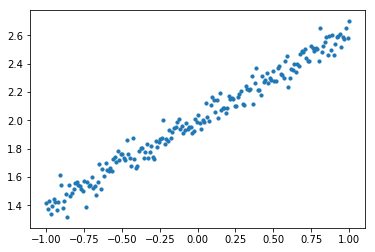

In [5]:
# plot data
plt.scatter(X,Y, s=10)


## 1.2 Split your data into training and testing data

In [6]:
X_train, Y_train = X[:160], Y[:160] # training dataset
X_test, Y_test = X[160:], Y[160:] # test dataset

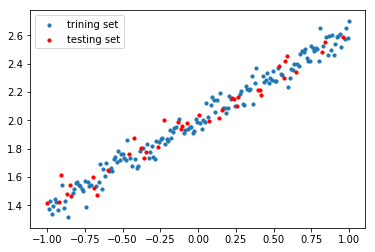

In [7]:
plt.scatter(X_train,Y_train, s=10, label="trining set")
plt.scatter(X_test, Y_test, s=10, c="r", label="testing set")
plt.legend(loc='best')

# 2 Create Model
Define a network of layers (or model ) that maps your inputs to your targets.

In [8]:
# Construct model
model = Sequential()
model.add(Dense(input_dim=1, units=1))

Instructions for updating:
Colocations handled automatically by placer.


# 3 Compile Model
Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.

In [9]:
# select loss function and optimizer
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=['acc'])

# 4 Training
Iterate on your training data by calling the fit() method of your model.

In [10]:
# Training
print('Training -----------')
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100)

Training -----------
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
160/160 [==============================] - 1s 5ms/step - loss: 3.7456 - acc: 0.0000e+00
Epoch 2/100
160/160 [==============================] - 0s 173us/step - loss: 3.0612 - acc: 0.0000e+00
Epoch 3/100
160/160 [==============================] - 0s 125us/step - loss: 2.5032 - acc: 0.0000e+00
Epoch 4/100
160/160 [==============================] - 0s 84us/step - loss: 2.0460 - acc: 0.0000e+00
Epoch 5/100
160/160 [==============================] - 0s 77us/step - loss: 1.6731 - acc: 0.0000e+00
Epoch 6/100
160/160 [==============================] - 0s 43us/step - loss: 1.3684 - acc: 0.0000e+00
Epoch 7/100
160/160 [==============================] - 0s 71us/step - loss: 1.1193 - acc: 0.0000e+00
Epoch 8/100
160/160 [==============================] - 0s 81us/step - loss: 0.9158 - acc: 0.0000e+00
Epoch 9/100
160/160 [==============================] - 0s 62us/step - loss: 0.7493 - acc: 0.0000e+00
Epoch 10/100
160/160 

In [11]:
hist.history.keys()

dict_keys(['loss', 'acc'])

Show parameters W and b

In [12]:
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

Weights= [[0.61413586]] 
biases= [2.0042949]


# 5 Testing

In [13]:
# testing
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40, verbose=1)
print('test cost:', cost)


Testing ------------
40/40 [==============================] - 0s 856us/step
test cost: [0.003675151616334915, 0.0]


# 6 Plot the result

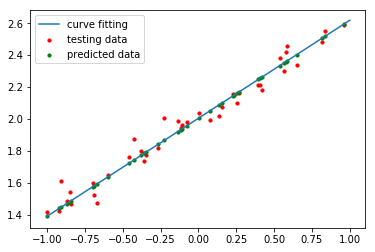

In [14]:
# plot the result
Y_pred = model.predict(X_test)
x = [-1,1]
y = f(x,W,b).transpose()
plt.plot(x, y, '-', label='curve fitting')
plt.scatter(X_test, Y_test, s=10, color='r', label='testing data')
plt.scatter(X_test, Y_pred, s=10, color='g', label='predicted data')
plt.legend(loc='best')

# 7 Analysis and Conclusion

we can deduce from the above plot that our model is satisfactury